In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)


In [3]:
mHe4 = 3.73
alpha = 1/137.036
hbarc2 = 0.389379304* 10**6
hbar = 197.326e-3
me = 0.511e-3

In [4]:
def fc(t):
    c = 0.7471356
    popt = np.array([ 3.24277583e+01, -1.64058979e+02,  3.49621641e+02, -3.92925094e+02,
        2.51960592e+02, -9.50854187e+01,  2.07480478e+01, -2.38965558e+00,
        1.09909609e-01])
    return np.select([t<=3, t>=3], [np.poly1d(popt)((t+c)**(-1))/ np.poly1d(popt)(1/c), np.poly1d(popt)((t+c)**(-1))/ np.poly1d(popt)(1/c) * (3/t)**11] )

In [5]:
def fc(t):
    c = 0.7471356
    return (-15.90270616 * (t+c)**(-8) + 408.6089679* (t+c)**(-7) - 1509.16153506 * (t+c)**(-6) + 2555.90104941 * (t+c)**(-5) -2235.08186094 * (t+c)**(-4) + 965.53169709 * (t+c)**(-3) -154.69807853*(t+c)**(-2) - 13.69047277 * (t+c)**(-1) + 4.99214927)/ 134.346402

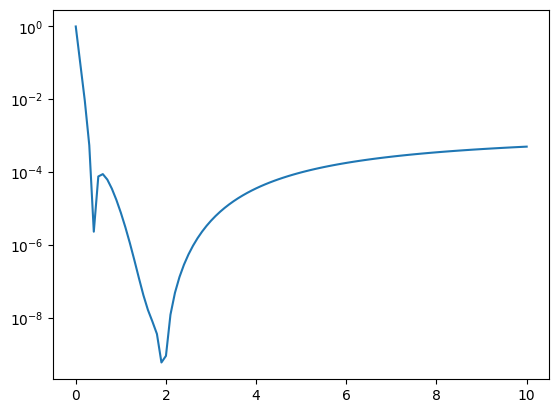

In [6]:
dummy = np.linspace(0, 10, 101)
plt.plot(dummy, fc(dummy)**2)
plt.yscale('log')
plt.show()

In [7]:
def jacobian(abst, Eprime_e):
    return np.pi/Eprime_e/Eprime_e

In [8]:
hbarc2   = 0.389379304* 10**6
def fc(t):
    c = 0.7471356
    return (-15.90270616 * (t+c)**(-8) + 408.6089679* (t+c)**(-7) - 1509.16153506 * (t+c)**(-6) + 2555.90104941 * (t+c)**(-5) -2235.08186094 * (t+c)**(-4) + 965.53169709 * (t+c)**(-3) -154.69807853*(t+c)**(-2) - 13.69047277 * (t+c)**(-1) + 4.99214927)/ 134.346402
    
def dsigmadOmega(abst, E_prime_e, Eprime_theta, E_e):
    return hbarc2*(2*alpha)**2 * E_prime_e * np.cos(Eprime_theta/2)**2 * fc(abst)**2/4/E_e**3 /np.sin(Eprime_theta/2)**4

def dsigmadQ2(abst, E_e):
    E_prime_ed = E_e - abst/2/mHe4
    costeld = 1 - abst/(2*E_e*E_prime_ed)
    sinteld = np.sqrt(1-costeld**2)
    E_prime_thetad = np.arctan2(sinteld, costeld)
    return np.pi/E_prime_ed**2 *dsigmadOmega(abst, E_prime_ed, E_prime_thetad, E_e)

In [12]:
FT_counts = [[0.52, 207.43669885491], [0.5200000000000005, 112.93583289668368], [0.5299999999999998, 207.43669885490954], [0.5300000000000002, 67.16197594816822], [0.5400000000000005, 207.43669885490908], [0.5400000000000005, 67.16197594816822], [0.5500000000000003, 201.5303947325201], [0.56, 203.00697076311735], [0.5699999999999998, 205.96012282431184], [0.5800000000000005, 533.760001616907], [0.5800000000000001, 207.43669885491], [0.5899999999999999, 541.1428817698934], [0.5900000000000003, 446.64201581166753], [0.5900000000000003, 352.1411498534426], [0.5900000000000003, 229.5853393138682], [0.6000000000000001, 535.2365776475044], [0.6100000000000003, 536.7131536781014], [0.6200000000000006, 536.7131536781014], [0.6300000000000003, 538.1897297086991], [0.6400000000000001, 682.8941807072317], [0.6400000000000001, 560.3383701676582], [0.6500000000000004, 871.8959126236825], [0.6500000000000004, 777.3950466654571], [0.6500000000000004, 682.8941807072317], [0.6500000000000004, 561.8149461982553], [0.6600000000000001, 871.895912623683], [0.6600000000000001, 777.3950466654571], [0.6600000000000006, 682.8941807072317], [0.6600000000000006, 561.814946198255], [0.6700000000000004, 868.942760562488], [0.6800000000000002, 870.4193365930855], [0.6900000000000004, 871.895912623683], [0.7000000000000006, 874.8490646848772], [0.7100000000000004, 1146.5390543147755], [0.7100000000000004, 1052.03818835655], [0.7100000000000004, 913.2400414804065], [0.7200000000000002, 1146.5390543147755], [0.7200000000000002, 1052.03818835655], [0.7200000000000002, 913.2400414804065], [0.7300000000000004, 1140.6327501923868], [0.7400000000000007, 1142.109326222984], [0.7500000000000004, 1142.1093262229838], [0.7600000000000002, 1142.1093262229838], [0.7700000000000005, 1329.634482108838], [0.7700000000000005, 1235.1336161506122], [0.7700000000000005, 1139.1561741617895], [0.7800000000000007, 1332.5876341700323], [0.7800000000000007, 1238.0867682118067], [0.7800000000000007, 1142.1093262229838], [0.7900000000000005, 1331.111058139435], [0.8000000000000003, 1331.111058139435], [0.81, 1331.1110581394348], [0.8200000000000007, 1334.0642102006295], [0.830000000000001, 1450.713716617814], [0.830000000000001, 1341.4470903536157], [0.8400000000000003, 1450.713716617814], [0.8400000000000003, 1342.923666384213], [0.8500000000000001, 1446.2839885260223], [0.8600000000000008, 1446.2839885260223], [0.870000000000001, 1447.7605645566196], [0.8799999999999999, 1486.1515413521488], [0.8900000000000006, 1554.0740387596234], [0.8900000000000006, 1452.1902926484113], [0.9000000000000008, 1554.0740387596234], [0.9000000000000012, 1452.1902926484113], [0.910000000000001, 1554.0740387596234], [0.9100000000000006, 1453.6668686790085], [0.9200000000000004, 1551.1208866984286], [0.9300000000000006, 1551.1208866984286], [0.9400000000000008, 1546.691158606637], [0.9500000000000006, 1545.2145825760397], [0.9600000000000004, 1545.21458257604], [0.9700000000000006, 1537.8317024230532], [0.9800000000000009, 1536.355126392456], [0.9900000000000007, 1537.8317024230532], [1.0000000000000004, 1554.0740387596234], [1.0100000000000002, 1554.0740387596234], [1.0200000000000005, 1557.0271908208179], [1.0300000000000002, 1557.0271908208179], [1.04, 1567.363223034999], [1.0500000000000007, 1567.363223034999], [1.060000000000001, 1564.410070973804], [1.0700000000000007, 1564.410070973804], [1.0800000000000005, 1562.9334949432068], [1.0900000000000012, 1558.503766851415], [1.100000000000001, 1557.0271908208179], [1.1100000000000008, 1557.0271908208179], [1.12, 1559.9803428820123], [1.12, 1450.713716617814], [1.1300000000000003, 1559.9803428820123], [1.1300000000000003, 1450.713716617814], [1.140000000000001, 1441.8542604342306], [1.1500000000000012, 1438.901108373036], [1.160000000000001, 1437.4245323424386], [1.1700000000000008, 1418.2290439446742], [1.180000000000001, 1413.7993158528823], [1.1900000000000008, 1413.799315852882], [1.200000000000001, 1412.322739822285], [1.2100000000000009, 1391.6506753939232], [1.2200000000000006, 1391.6506753939234], [1.2300000000000009, 1391.6506753939234], [1.2400000000000007, 1391.650675393923], [1.2500000000000004, 1394.6038274551177], [1.2600000000000002, 1396.0804034857151], [1.270000000000001, 1400.5101315775069], [1.2800000000000007, 1400.5101315775069], [1.290000000000001, 1400.5101315775069], [1.3000000000000016, 1403.4632836387013], [1.3000000000000012, 1291.2435053133086], [1.3100000000000014, 1400.5101315775069], [1.3100000000000014, 1289.7669292827115], [1.3200000000000007, 1276.4777450073357], [1.3300000000000005, 1275.0011689767387], [1.3400000000000007, 1276.477745007336], [1.350000000000001, 1276.4777450073357], [1.3600000000000008, 1276.4777450073357], [1.370000000000001, 1280.9074730991276], [1.3800000000000008, 1282.3840491297246], [1.3900000000000006, 1283.8606251603221], [1.4000000000000004, 1283.8606251603221], [1.410000000000001, 1283.8606251603221], [1.4200000000000017, 1288.290353252114], [1.4200000000000017, 1190.836335232694], [1.430000000000002, 1288.2903532521138], [1.430000000000001, 1190.8363352326937], [1.4400000000000013, 1193.7894872938887], [1.4500000000000006, 1192.3129112632914], [1.4600000000000013, 1190.8363352326937], [1.4700000000000015, 1156.8750865289567], [1.4700000000000015, 1097.8120453050658], [1.4800000000000009, 1193.7894872938884], [1.4800000000000009, 1094.858893243871], [1.4900000000000015, 1159.8282385901512], [1.4900000000000015, 1094.858893243871], [1.5000000000000013, 1094.858893243871], [1.5100000000000007, 1091.9057411826764], [1.5200000000000005, 1091.9057411826766], [1.5300000000000011, 1090.4291651520793], [1.540000000000001, 1074.1868288155092], [1.5500000000000012, 1071.2336767543147], [1.560000000000001, 1054.9913404177446], [1.5700000000000007, 1052.03818835655], [1.5800000000000014, 1050.561612325953], [1.5900000000000016, 1049.0850362953556], [1.600000000000001, 1054.9913404177448], [1.6000000000000014, 956.0607463677272], [1.6100000000000008, 1052.03818835655], [1.6100000000000012, 954.58417033713], [1.6200000000000014, 954.5841703371302], [1.6300000000000012, 954.58417033713], [1.6400000000000015, 954.58417033713], [1.6500000000000017, 956.0607463677272], [1.660000000000001, 975.2562347654919], [1.6700000000000008, 976.7328107960889], [1.6800000000000006, 978.2093868266866], [1.6900000000000013, 995.928299193854], [1.7000000000000015, 997.404875224451], [1.7100000000000013, 995.9282991938537], [1.720000000000001, 1001.8346033162429], [1.720000000000001, 892.5679770520449], [1.7300000000000009, 1001.8346033162427], [1.7300000000000009, 891.0914010214472], [1.7400000000000015, 879.2787927766692], [1.7500000000000013, 877.8022167460717], [1.7600000000000011, 877.8022167460717], [1.7700000000000018, 880.7553688072667], [1.7700000000000014, 781.8247747572493], [1.7800000000000016, 880.7553688072662], [1.7800000000000011, 778.8716226960546], [1.7900000000000014, 770.0121665124709], [1.8000000000000012, 764.1058623900817], [1.8100000000000018, 762.6292863594847], [1.820000000000002, 762.6292863594847], [1.8300000000000014, 762.6292863594849], [1.8400000000000007, 762.6292863594845], [1.8500000000000019, 762.6292863594847], [1.860000000000002, 762.6292863594847], [1.8700000000000019, 762.6292863594847], [1.8800000000000012, 762.6292863594847], [1.890000000000001, 764.1058623900817], [1.9000000000000012, 770.0121665124709], [1.910000000000001, 771.4887425430682], [1.9200000000000013, 777.3950466654571], [1.9300000000000015, 780.3481987266518], [1.9400000000000013, 778.8716226960546], [1.950000000000001, 772.9653185736652], [1.9600000000000009, 770.0121665124709], [1.9700000000000015, 767.0590144512764], [1.9800000000000022, 764.1058623900819], [1.990000000000002, 764.1058623900819], [2.0000000000000018, 762.6292863594845], [2.0100000000000016, 761.1527103288872], [2.020000000000001, 765.582438420679], [2.0200000000000005, 656.3158121564807], [2.0300000000000007, 762.6292863594847], [2.0300000000000007, 654.8392361258834], [2.0400000000000005, 647.456355972897], [2.05, 644.5032039117025], [2.0599999999999996, 643.0266278811055], [2.0699999999999994, 635.6437477281186], [2.079999999999999, 634.1671716975216], [2.0899999999999994, 626.7842915445356], [2.099999999999999, 623.8311394833408], [2.1099999999999994, 622.3545634527434], [2.1199999999999988, 622.3545634527434], [2.1299999999999986, 620.8779874221464], [2.139999999999999, 619.4014113915489], [2.149999999999998, 619.4014113915489], [2.1599999999999975, 616.4482593303544], [2.1699999999999977, 614.9716832997569], [2.1799999999999975, 614.9716832997569], [2.1899999999999973, 613.4951072691597], [2.199999999999997, 613.4951072691597], [2.209999999999997, 612.0185312385622], [2.2199999999999966, 612.0185312385624], [2.2299999999999964, 610.5419552079652], [2.239999999999996, 609.0653791773682], [2.2499999999999964, 600.2059229937843], [2.2599999999999953, 598.7293469631873], [2.269999999999995, 588.3933147490061], [2.279999999999995, 586.9167387184091], [2.2899999999999947, 586.9167387184091], [2.2999999999999945, 586.9167387184089], [2.3099999999999943, 563.2915222288525], [2.319999999999994, 561.814946198255], [2.329999999999994, 560.338370167658], [2.3399999999999945, 538.1897297086991], [2.349999999999994, 536.7131536781014], [2.3599999999999937, 536.7131536781017], [2.3699999999999934, 536.7131536781017], [2.379999999999994, 536.7131536781014], [2.389999999999993, 536.7131536781014], [2.3999999999999937, 536.7131536781017], [2.4099999999999926, 536.7131536781017], [2.4199999999999924, 536.7131536781014], [2.429999999999993, 536.7131536781014], [2.439999999999992, 530.8068495557125], [2.4499999999999917, 529.330273525115], [2.4599999999999915, 529.3302735251152], [2.4699999999999913, 524.9005454333233], [2.479999999999991, 521.947393372129], [2.489999999999991, 520.4708173415315], [2.4999999999999907, 517.5176652803368], [2.5099999999999905, 516.0410892497398], [2.5199999999999902, 513.0879371885451], [2.52999999999999, 508.6582090967536], [2.53999999999999, 508.65820909675335], [2.5499999999999887, 507.18163306615634], [2.5599999999999894, 507.18163306615634], [2.569999999999989, 505.70505703555887], [2.579999999999988, 505.70505703555887], [2.5899999999999888, 505.7050570355591], [2.5999999999999885, 504.2284810049614], [2.6099999999999874, 504.22848100496117], [2.619999999999988, 502.75190497436415], [2.629999999999988, 501.27532894376714], [2.6399999999999877, 501.27532894376714], [2.6499999999999866, 498.3221768825724], [2.6599999999999873, 496.8456008519752], [2.669999999999987, 495.36902482137793], [2.6799999999999877, 483.55641657659976], [2.6899999999999875, 480.6032645154053], [2.6999999999999864, 470.2672323012241], [2.709999999999986, 467.3140802400296], [2.719999999999986, 467.3140802400296], [2.7299999999999858, 464.36092817883537], [2.7399999999999856, 452.5483199340572], [2.7499999999999853, 451.0717439034597], [2.7599999999999842, 451.0717439034597], [2.769999999999984, 436.30598359748683], [2.7799999999999847, 436.30598359748683], [2.7899999999999845, 436.30598359748706], [2.7999999999999843, 436.30598359748683], [2.809999999999984, 445.1654397810703], [2.819999999999983, 446.64201581166753], [2.8299999999999836, 455.5014719952517], [2.8399999999999843, 458.45462405644594], [2.849999999999983, 456.9780480258489], [2.859999999999982, 442.21228771987603], [2.869999999999983, 442.21228771987603], [2.8799999999999826, 428.92310344450084], [2.8899999999999832, 427.44652741390337], [2.899999999999983, 425.9699513833059], [2.909999999999982, 425.9699513833059], [2.9199999999999817, 424.4933753527084], [2.9299999999999815, 408.25103901613875], [2.9399999999999813, 406.77446298554173], [2.949999999999981, 392.0087026795686], [2.959999999999981, 390.53212664897137], [2.9699999999999807, 390.53212664897137], [2.9799999999999796, 392.0087026795684], [2.9899999999999802, 393.48527871016586], [2.999999999999979, 394.96185474076333], [3.0099999999999807, 396.4384307713606], [3.0199999999999796, 397.9150068019578], [3.0299999999999794, 397.91500680195804], [3.039999999999979, 399.39158283255506], [3.049999999999979, 399.3915828325553], [3.0599999999999787, 399.3915828325553], [3.0699999999999785, 402.3447348937498], [3.0799999999999783, 405.29788695494403], [3.089999999999978, 405.2978869549445], [3.099999999999977, 384.6258225265824], [3.1099999999999777, 381.6726704653879], [3.1199999999999775, 378.7195184041934], [3.1299999999999772, 361.0006060370256], [3.139999999999977, 361.0006060370258], [3.149999999999977, 361.0006060370258], [3.1599999999999766, 363.9537580982203], [3.1699999999999764, 384.6258225265826], [3.179999999999976, 386.10239855717987], [3.189999999999976, 406.7744629855415], [3.199999999999975, 408.25103901613875], [3.2099999999999755, 408.25103901613875], [3.2199999999999744, 392.0087026795684], [3.2299999999999742, 387.5789745877771], [3.239999999999974, 386.10239855717964], [3.2499999999999747, 365.430334128818], [3.2599999999999745, 365.430334128818], [3.2699999999999734, 365.4303341288178], [3.279999999999974, 365.430334128818], [3.289999999999974, 372.81321428180445], [3.2999999999999736, 375.7663663429987], [3.3099999999999734, 378.7195184041932], [3.319999999999973, 380.19609443479044], [3.329999999999973, 378.7195184041934], [3.3399999999999728, 371.336638251207], [3.3499999999999734, 369.8600622206095], [3.3599999999999723, 369.86006222060973], [3.369999999999972, 362.4771820676233], [3.379999999999972, 361.00060603702605], [3.3899999999999726, 358.04745397583133], [3.3999999999999715, 358.04745397583133], [3.4099999999999713, 356.57087794523386], [3.419999999999971, 355.09430191463684], [3.4299999999999717, 353.6177258840398], [3.4399999999999697, 352.14114985344236], [3.4499999999999704, 350.66457382284534], [3.45999999999997, 344.7582697004557], [3.46999999999997, 341.8051176392612], [3.479999999999969, 337.3753895474697], [3.4899999999999687, 335.8988135168727], [3.4999999999999694, 335.89881351687245], [3.5099999999999683, 337.37538954746947], [3.519999999999969, 337.37538954746947], [3.5299999999999687, 341.8051176392612], [3.5399999999999685, 344.75826970045614], [3.5499999999999683, 350.66457382284534], [3.559999999999968, 350.66457382284534], [3.569999999999968, 350.6645738228451], [3.5799999999999677, 338.8519655780665], [3.5899999999999666, 335.89881351687245], [3.5999999999999672, 325.5627813026915], [3.609999999999967, 324.0862052720943], [3.6199999999999677, 324.08620527209405], [3.6299999999999666, 324.0862052720938], [3.6399999999999673, 325.5627813026913], [3.649999999999966, 325.5627813026915], [3.659999999999966, 327.03935733328876], [3.669999999999965, 327.0393573332883], [3.6799999999999655, 327.03935733328854], [3.6899999999999653, 328.515933363886], [3.699999999999965, 329.992509394483], [3.709999999999965, 341.8051176392614], [3.7199999999999647, 343.2816936698589], [3.7299999999999645, 353.6177258840398], [3.7399999999999642, 353.6177258840396], [3.749999999999964, 353.6177258840398], [3.759999999999964, 347.7114217616506], [3.7699999999999636, 344.7582697004559], [3.7799999999999625, 340.32854160866395], [3.789999999999963, 340.3285416086642], [3.799999999999963, 338.8519655780667], [3.8099999999999627, 334.422237486275], [3.8199999999999625, 334.422237486275], [3.8299999999999623, 331.4690854250807], [3.839999999999962, 329.99250939448325], [3.849999999999962, 324.08620527209405], [3.8599999999999617, 324.08620527209405], [3.8699999999999615, 321.13305321089956], [3.879999999999962, 318.1799011497053], [3.88999999999996, 316.70332511910783], [3.89999999999996, 313.7501730579131], [3.9099999999999606, 312.27359702731565], [3.9199999999999613, 312.2735970273159], [3.9299999999999593, 313.75017305791334], [3.939999999999961, 324.08620527209405], [3.949999999999959, 327.0393573332881], [3.9599999999999604, 337.37538954746947], [3.9699999999999593, 337.37538954746947], [3.979999999999959, 338.8519655780667], [3.989999999999959, 337.3753895474697], [3.9999999999999596, 332.94566145567774], [4.009999999999959, 329.992509394483], [4.019999999999959, 325.5627813026913], [4.02999999999996, 324.08620527209405], [4.039999999999958, 324.08620527209405], [4.049999999999958, 321.13305321089956], [4.059999999999958, 315.22674908851013], [4.069999999999958, 312.2735970273159], [4.079999999999957, 307.84386893552414], [4.089999999999959, 306.3672929049271], [4.099999999999957, 307.84386893552437], [4.109999999999959, 309.3204449661216], [4.119999999999957, 309.3204449661214], [4.129999999999956, 310.79702099671863], [4.139999999999956, 313.75017305791334], [4.149999999999956, 319.6564771803023], [4.159999999999956, 319.6564771803023], [4.1699999999999555, 318.17990114970485], [4.179999999999955, 318.17990114970485], [4.189999999999955, 318.1799011497051], [4.199999999999955, 316.70332511910783], [4.209999999999955, 315.2267490885106], [4.2199999999999545, 313.75017305791334], [4.229999999999954, 307.8438689355239], [4.239999999999954, 307.8438689355239], [4.249999999999954, 307.84386893552414], [4.349999999999952, 297.50783672134344], [4.359999999999953, 306.3672929049269], [4.369999999999951, 306.3672929049269], [4.379999999999951, 312.2735970273161], [4.389999999999951, 313.75017305791334], [4.399999999999951, 316.7033251191076], [4.40999999999995, 319.6564771803023], [4.41999999999995, 319.6564771803023], [4.42999999999995, 322.6096292414966], [4.43999999999995, 324.0862052720938], [4.449999999999951, 328.515933363886], [4.459999999999951, 328.51593336388623], [4.469999999999949, 325.5627813026915], [4.479999999999949, 315.2267490885106], [4.489999999999949, 313.7501730579131], [4.4999999999999485, 300.4609887825377], [4.50999999999995, 298.9844127519407], [4.519999999999948, 298.9844127519407], [4.529999999999948, 298.9844127519407], [4.539999999999948, 300.4609887825377], [4.549999999999947, 301.9375648131347], [4.559999999999947, 301.93756481313494], [4.569999999999947, 301.9375648131347], [4.579999999999947, 301.93756481313494], [4.589999999999948, 303.4141408437322], [4.599999999999948, 306.3672929049269], [4.609999999999946, 307.8438689355239], [4.619999999999948, 309.3204449661216], [4.629999999999946, 310.79702099671886], [4.639999999999947, 312.2735970273161], [4.649999999999945, 313.75017305791334], [4.659999999999945, 322.6096292414968], [4.669999999999945, 324.08620527209405], [4.679999999999945, 332.94566145567774], [4.689999999999944, 334.422237486275], [4.699999999999944, 334.4222374862752], [4.709999999999944, 321.13305321089956], [4.719999999999946, 321.13305321089956], [4.729999999999944, 319.6564771803023], [4.739999999999943, 309.3204449661216], [4.749999999999943, 306.3672929049269], [4.759999999999945, 306.3672929049269], [4.769999999999943, 304.8907168743294], [4.779999999999944, 298.98441275194045], [4.789999999999942, 294.5546846601485], [4.799999999999942, 288.6483805377595], [4.809999999999942, 282.74207641537055], [4.819999999999943, 281.2655003847731], [4.8299999999999415, 282.7420764153703], [4.839999999999941, 282.7420764153703], [4.849999999999941, 297.50783672134344], [4.859999999999941, 298.9844127519402], [4.869999999999941, 298.98441275194045], [4.87999999999994, 312.2735970273159], [4.88999999999994, 313.75017305791334], [4.89999999999994, 312.2735970273159], [4.90999999999994, 309.3204449661216], [4.9199999999999395, 307.84386893552437], [4.929999999999939, 304.8907168743292], [4.939999999999939, 303.4141408437322], [4.949999999999941, 303.4141408437324], [4.959999999999939, 303.4141408437324], [4.96999999999994, 306.36729290492667], [4.979999999999938, 307.8438689355239], [4.98999999999994, 309.3204449661214], [4.999999999999938, 310.79702099671863], [5.009999999999939, 312.2735970273159], [5.019999999999937, 312.2735970273161], [5.029999999999937, 312.2735970273161], [5.039999999999937, 312.27359702731565], [5.0499999999999385, 312.2735970273159], [5.0599999999999365, 312.2735970273159], [5.069999999999936, 312.2735970273161], [5.079999999999938, 312.2735970273159], [5.089999999999936, 324.08620527209405], [5.099999999999936, 325.5627813026913], [5.1099999999999355, 328.515933363886], [5.119999999999935, 338.85196557806694], [5.129999999999935, 337.37538954746947], [5.139999999999935, 325.5627813026913], [5.149999999999935, 324.0862052720938], [5.159999999999934, 321.13305321089956], [5.169999999999934, 321.1330532108998], [5.179999999999934, 307.84386893552414], [5.189999999999934, 306.3672929049269], [5.199999999999934, 304.8907168743294], [5.209999999999933, 297.50783672134344], [5.219999999999933, 294.5546846601485], [5.229999999999933, 288.6483805377595], [5.239999999999933, 287.1718045071623], [5.2499999999999325, 285.6952284765648], [5.259999999999934, 287.1718045071623], [5.269999999999932, 315.22674908851036], [5.279999999999934, 315.2267490885106], [5.289999999999932, 344.75826970045614], [5.299999999999933, 346.2348457310534], [5.309999999999931, 346.2348457310529], [5.319999999999931, 346.23484573105316], [5.329999999999931, 334.422237486275], [5.339999999999931, 332.94566145567796], [5.34999999999993, 322.6096292414966], [5.35999999999993, 321.13305321089956], [5.36999999999993, 319.6564771803023], [5.37999999999993, 316.7033251191076], [5.3899999999999295, 297.50783672134344], [5.399999999999929, 294.5546846601485], [5.409999999999929, 275.3591962623841], [5.419999999999929, 273.88262023178663], [5.429999999999929, 273.88262023178686], [5.4399999999999284, 275.35919626238433], [5.44999999999993, 300.4609887825379], [5.45999999999993, 303.4141408437322], [5.46999999999993, 303.4141408437322], [5.479999999999928, 325.5627813026913], [5.489999999999927, 327.03935733328854], [5.499999999999927, 325.5627813026915], [5.509999999999929, 324.08620527209405], [5.519999999999927, 321.13305321089956], [5.529999999999928, 318.1799011497051], [5.539999999999928, 315.22674908851036], [5.549999999999926, 316.7033251191076], [5.559999999999928, 318.1799011497051], [5.569999999999926, 319.6564771803023], [5.579999999999927, 321.13305321089956], [5.589999999999925, 321.13305321089956], [5.599999999999927, 324.08620527209405], [5.609999999999925, 324.08620527209405], [5.619999999999925, 324.0862052720943], [5.629999999999924, 334.422237486275], [5.639999999999926, 334.422237486275], [5.649999999999924, 337.3753895474697], [5.659999999999924, 346.23484573105316], [5.6699999999999235, 344.75826970045614], [5.679999999999923, 325.5627813026913], [5.689999999999923, 321.1330532108998], [5.699999999999923, 321.13305321089956], [5.709999999999923, 296.03126069074597], [5.719999999999924, 296.03126069074597], [5.729999999999922, 296.03126069074574], [5.739999999999924, 300.4609887825377], [5.749999999999922, 304.8907168743294], [5.759999999999923, 306.3672929049271], [5.769999999999921, 306.3672929049271], [5.779999999999921, 312.2735970273159], [5.789999999999921, 313.7501730579131], [5.799999999999921, 312.27359702731565], [5.809999999999921, 312.2735970273159], [5.81999999999992, 312.2735970273159], [5.82999999999992, 312.2735970273161], [5.83999999999992, 312.2735970273161], [5.8499999999999215, 312.27359702731565], [5.8599999999999195, 312.2735970273159], [5.869999999999921, 312.2735970273159], [5.879999999999919, 312.2735970273161], [5.889999999999919, 313.75017305791334], [5.899999999999919, 313.7501730579131], [5.909999999999918, 316.7033251191074], [5.919999999999918, 316.7033251191076], [5.929999999999918, 316.7033251191076], [5.939999999999918, 318.1799011497051], [5.949999999999918, 318.1799011497053], [5.959999999999917, 319.6564771803021], [5.969999999999917, 319.6564771803023], [5.979999999999917, 318.1799011497051], [5.9899999999999185, 318.1799011497051], [5.9999999999999165, 318.1799011497053], [6.009999999999916, 316.7033251191076], [6.019999999999916, 315.22674908851036], [6.029999999999916, 316.7033251191076], [6.039999999999916, 319.6564771803023], [6.049999999999914, 322.6096292414966], [6.059999999999915, 324.0862052720938], [6.069999999999915, 324.08620527209405], [6.079999999999915, 327.03935733328854], [6.089999999999915, 327.03935733328854], [6.099999999999914, 324.08620527209405], [6.109999999999914, 318.1799011497053], [6.119999999999914, 313.7501730579131], [6.129999999999914, 307.84386893552414], [6.139999999999915, 306.3672929049269], [6.149999999999913, 307.84386893552414], [6.159999999999915, 309.3204449661214], [6.169999999999913, 316.7033251191074], [6.1799999999999145, 318.1799011497051], [6.189999999999914, 328.515933363886], [6.199999999999914, 328.51593336388623], [6.209999999999914, 328.51593336388623], [6.219999999999914, 328.5159333638858], [6.229999999999912, 315.22674908851036], [6.239999999999913, 315.2267490885106], [6.249999999999913, 303.4141408437324], [6.259999999999911, 303.4141408437324], [6.269999999999911, 303.4141408437322], [6.2799999999999105, 304.8907168743294], [6.28999999999991, 324.08620527209405], [6.29999999999991, 325.5627813026915], [6.30999999999991, 346.23484573105316], [6.31999999999991, 346.2348457310534], [6.3299999999999095, 347.7114217616506], [6.339999999999909, 347.7114217616506], [6.349999999999909, 347.7114217616504], [6.359999999999909, 347.7114217616506], [6.369999999999909, 347.7114217616506], [6.379999999999908, 346.23484573105316], [6.389999999999908, 346.23484573105316], [6.399999999999908, 334.422237486275], [6.4099999999999095, 332.94566145567796], [6.419999999999906, 332.94566145567796], [6.429999999999907, 321.13305321089956], [6.439999999999907, 321.13305321089956], [6.449999999999907, 321.13305321089956], [6.459999999999907, 329.99250939448325], [6.4699999999999065, 332.94566145567774], [6.479999999999906, 334.422237486275], [6.489999999999906, 346.2348457310534], [6.499999999999906, 346.2348457310529], [6.509999999999906, 343.2816936698589], [6.519999999999907, 343.2816936698589], [6.529999999999905, 340.3285416086642], [6.539999999999905, 338.8519655780665], [6.549999999999905, 332.94566145567774], [6.559999999999905, 331.4690854250807], [6.569999999999904, 329.99250939448325], [6.579999999999904, 329.99250939448325], [6.589999999999902, 329.99250939448325], [6.599999999999904, 329.9925093944835], [6.6099999999999035, 329.992509394483], [6.619999999999903, 329.99250939448325], [6.629999999999903, 332.94566145567796], [6.639999999999903, 335.89881351687245], [6.649999999999903, 338.8519655780665], [6.659999999999902, 340.3285416086642], [6.6699999999999005, 341.8051176392614], [6.679999999999902, 341.8051176392614], [6.689999999999902, 341.8051176392614], [6.699999999999903, 337.37538954746947], [6.709999999999901, 335.8988135168722], [6.719999999999899, 329.99250939448325], [6.729999999999901, 328.51593336388623], [6.739999999999901, 328.515933363886], [6.7499999999999005, 327.03935733328876], [6.7599999999999, 328.515933363886], [6.7699999999999, 337.37538954746947], [6.7799999999999, 338.8519655780667], [6.7899999999999014, 346.23484573105316], [6.7999999999998995, 349.18799779224787], [6.809999999999899, 349.1879977922474], [6.819999999999899, 349.18799779224764], [6.829999999999901, 356.5708779452341], [6.839999999999899, 358.0474539758311], [6.849999999999898, 362.4771820676233], [6.859999999999896, 363.95375809822053], [6.869999999999898, 363.95375809822076], [6.879999999999898, 363.9537580982203], [6.8899999999998975, 362.4771820676233], [6.899999999999897, 361.0006060370258], [6.909999999999899, 361.0006060370258], [6.919999999999895, 361.0006060370258], [6.9299999999998985, 362.4771820676233], [6.9399999999998965, 369.86006222060973], [6.949999999999898, 371.336638251207], [6.959999999999896, 371.336638251207], [6.969999999999896, 378.71951840419297], [6.979999999999896, 380.1960944347902], [6.989999999999895, 380.1960944347902], [6.999999999999895, 375.7663663429985], [7.009999999999895, 374.28979031240146], [7.019999999999895, 366.90691015941525], [7.0299999999998946, 365.4303341288178], [7.039999999999896, 365.4303341288178], [7.049999999999892, 362.4771820676233], [7.059999999999894, 358.04745397583133], [7.069999999999894, 356.5708779452343], [7.0799999999998935, 349.1879977922474], [7.089999999999893, 349.18799779224764], [7.099999999999893, 349.18799779224764], [7.109999999999893, 349.18799779224787], [7.119999999999893, 350.66457382284534], [7.129999999999892, 359.5240300064288], [7.139999999999892, 361.0006060370258], [7.149999999999892, 371.33663825120675], [7.159999999999892, 372.81321428180445], [7.16999999999989, 372.8132142818042], [7.179999999999891, 375.7663663429987], [7.189999999999891, 361.0006060370256], [7.199999999999889, 358.0474539758311], [7.209999999999891, 356.57087794523386], [7.2199999999998905, 343.28169366985867], [7.22999999999989, 343.2816936698589], [7.239999999999888, 343.28169366985867], [7.24999999999989, 347.7114217616504], [7.259999999999888, 347.7114217616504], [7.269999999999889, 349.18799779224764], [7.2799999999998875, 352.14114985344236], [7.289999999999889, 358.04745397583133], [7.299999999999889, 359.5240300064286], [7.309999999999889, 361.0006060370258], [7.319999999999888, 390.53212664897137], [7.329999999999888, 390.53212664897137], [7.339999999999888, 423.01679932211164], [7.349999999999888, 423.0167993221114], [7.359999999999886, 423.0167993221114], [7.369999999999887, 423.0167993221114], [7.379999999999889, 421.5402232915144], [7.389999999999887, 421.5402232915144], [7.399999999999887, 421.5402232915146], [7.4099999999998865, 421.54022329151417], [7.4199999999998845, 420.0636472609169], [7.429999999999886, 400.86815886315253], [7.439999999999886, 397.9150068019578], [7.449999999999886, 396.4384307713608], [7.459999999999885, 372.81321428180377], [7.469999999999885, 372.8132142818042], [7.479999999999885, 372.8132142818042], [7.489999999999885, 374.28979031240146], [7.4999999999998845, 397.9150068019578], [7.509999999999884, 399.3915828325555], [7.519999999999882, 423.0167993221114], [7.529999999999884, 427.44652741390314], [7.539999999999884, 427.44652741390314], [7.5499999999998835, 428.92310344450084], [7.5599999999998815, 428.92310344450084], [7.569999999999881, 428.9231034445006], [7.579999999999883, 430.39967947509786], [7.589999999999883, 430.3996794750981], [7.599999999999882, 430.39967947509786], [7.609999999999882, 421.5402232915144], [7.619999999999882, 420.0636472609169], [7.629999999999882, 411.20419107733323], [7.6399999999998816, 409.727615046736], [7.649999999999881, 408.25103901613875], [7.659999999999879, 409.727615046736], [7.669999999999881, 418.5870712303199], [7.679999999999881, 420.06364726091715], [7.6899999999998805, 421.5402232915144], [7.6999999999998785, 430.39967947509786], [7.70999999999988, 430.3996794750981], [7.71999999999988, 430.3996794750981], [7.72999999999988, 424.4933753527084], [7.739999999999879, 421.5402232915144], [7.749999999999879, 415.63391916912497], [7.759999999999877, 414.1573431385277], [7.769999999999881, 412.6807671079307], [7.779999999999879, 414.1573431385277], [7.789999999999878, 431.8762555056951], [7.799999999999878, 434.8294075668896], [7.809999999999876, 437.7825596280843], [7.819999999999878, 459.9312000870432], [7.8299999999998775, 461.40777611764065], [7.839999999999877, 464.36092817883514], [7.849999999999877, 465.83750420943215], [7.859999999999877, 468.79065627062687], [7.869999999999877, 470.2672323012241], [7.879999999999876, 474.6969603930163], [7.889999999999876, 477.65011245421056], [7.899999999999876, 479.1266884848078], [7.909999999999876, 480.60326451540504], [7.919999999999876, 492.41587276018345], [7.929999999999875, 495.36902482137793], [7.939999999999877, 505.7050570355591], [7.949999999999875, 507.1816330661561], [7.959999999999875, 505.70505703555887], [7.9699999999998745, 486.5095686377945], [7.979999999999874, 486.50956863779425], [7.989999999999874, 464.36092817883537], [7.999999999999874, 464.3609281788349], [8.009999999999872, 464.36092817883514], [8.019999999999873, 464.36092817883514], [8.029999999999873, 465.8375042094324], [8.039999999999873, 485.03299260719723], [8.049999999999873, 486.5095686377945], [8.059999999999873, 505.7050570355591], [8.069999999999872, 505.70505703555864], [8.079999999999872, 505.70505703555887], [8.089999999999872, 501.27532894376714], [8.099999999999872, 499.7987529131699], [8.109999999999872, 492.415872760183], [8.119999999999873, 492.4158727601832], [8.129999999999871, 490.939296729586], [8.13999999999987, 492.4158727601832], [8.14999999999987, 492.4158727601832], [8.15999999999987, 492.4158727601832], [8.16999999999987, 492.415872760183], [8.17999999999987, 493.8924487907807], [8.189999999999872, 493.8924487907807], [8.19999999999987, 496.8456008519754], [8.20999999999987, 498.32217688257265], [8.21999999999987, 530.8068495557125], [8.229999999999869, 532.2834255863097], [8.239999999999869, 563.2915222288523], [8.249999999999869, 563.2915222288525], [8.259999999999868, 561.8149461982553], [8.269999999999868, 532.2834255863097], [8.279999999999868, 530.8068495557125], [8.289999999999868, 501.2753289437669], [8.299999999999867, 501.2753289437669], [8.309999999999867, 499.79875291316966], [8.319999999999865, 501.27532894376714], [8.329999999999867, 501.2753289437669], [8.339999999999867, 504.22848100496117], [8.349999999999866, 504.2284810049614], [8.359999999999866, 505.70505703555887], [8.369999999999864, 507.18163306615634], [8.379999999999868, 508.6582090967531], [8.389999999999864, 532.2834255863097], [8.399999999999865, 535.2365776475042], [8.409999999999865, 536.7131536781014], [8.419999999999865, 560.3383701676582], [8.429999999999865, 560.338370167658], [8.439999999999864, 557.3852181064628], [8.449999999999863, 557.3852181064635], [8.459999999999866, 555.908642075866], [8.469999999999864, 552.9554900146718], [8.479999999999865, 550.0023379534773], [8.489999999999863, 550.0023379534769], [8.499999999999863, 550.0023379534769], [8.509999999999863, 552.9554900146718], [8.519999999999863, 588.3933147490061], [8.529999999999863, 589.8698907796033], [8.539999999999862, 625.3077155139383], [8.54999999999986, 625.3077155139379], [8.559999999999862, 609.065379177368], [8.569999999999862, 607.5888031467707], [8.579999999999863, 604.6356510855765], [8.58999999999986, 604.6356510855765], [8.599999999999861, 586.9167387184089], [8.60999999999986, 586.9167387184091], [8.61999999999986, 586.9167387184091], [8.62999999999986, 589.8698907796031], [8.63999999999986, 694.7067889520104], [8.63999999999986, 592.823042840798], [8.64999999999986, 694.7067889520099], [8.649999999999858, 594.2996188713953], [8.65999999999986, 690.277060860218], [8.66999999999986, 691.7536368908152], [8.67999999999986, 676.9878765848428], [8.68999999999986, 675.5113005542453], [8.699999999999857, 674.0347245236483], [8.70999999999986, 657.7923881870781], [8.719999999999859, 654.8392361258834], [8.729999999999858, 653.362660095286], [8.739999999999858, 653.3626600952862], [8.749999999999858, 641.550051850508], [8.759999999999858, 640.0734758199105], [8.769999999999857, 628.2608675751326], [8.779999999999857, 626.7842915445353], [8.789999999999857, 626.7842915445356], [8.799999999999857, 626.7842915445356], [8.809999999999857, 631.2140196363271], [8.819999999999856, 669.6049964318559], [8.829999999999856, 671.0815724624536], [8.839999999999856, 712.425701319177], [8.849999999999854, 713.9022773497743], [8.859999999999856, 715.3788533803718], [8.869999999999855, 718.332005441566], [8.879999999999855, 718.3320054415663], [8.889999999999855, 718.3320054415663], [8.899999999999855, 722.7617335333582], [8.909999999999854, 724.2383095639555], [8.919999999999854, 727.1914616251502], [8.929999999999852, 728.6680376557472], [8.939999999999854, 756.7229822370953], [8.949999999999854, 759.67613429829], [8.959999999999853, 784.7779268184438], [8.969999999999851, 787.7310788796381], [8.979999999999855, 789.2076549102353], [8.989999999999851, 812.8328713997919], [8.999999999999854, 814.3094474303891], [9.009999999999852, 836.4580878893485], [9.019999999999852, 837.9346639199455], [9.029999999999852, 837.9346639199453], [9.039999999999852, 837.9346639199455], [9.049999999999851, 832.0283597975563], [9.059999999999853, 832.0283597975563], [9.069999999999851, 826.1220556751675], [9.079999999999849, 824.6454796445696], [9.08999999999985, 824.6454796445703], [9.099999999999849, 826.1220556751673], [9.10999999999985, 860.0833043789046], [9.119999999999848, 863.0364564400991], [9.129999999999852, 864.5130324706963], [9.13999999999985, 901.4274332356281], [9.149999999999848, 902.9040092662256], [9.15999999999985, 904.3805852968228], [9.169999999999849, 904.3805852968228], [9.179999999999849, 911.763465449809], [9.189999999999849, 913.2400414804063], [9.199999999999848, 922.0994976639902], [9.209999999999848, 923.5760736945874], [9.219999999999848, 925.0526497251847], [9.229999999999848, 933.9121059087681], [9.239999999999847, 936.8652579699626], [9.249999999999847, 938.3418340005599], [9.259999999999847, 947.201290184144], [9.269999999999847, 947.2012901841438], [9.279999999999847, 948.677866214741], [9.289999999999846, 987.0688430102703], [9.299999999999846, 988.5454190408673], [9.309999999999846, 1026.9363958363965], [9.319999999999846, 1028.4129718669938], [9.329999999999844, 1028.4129718669938], [9.339999999999847, 1029.889547897591], [9.349999999999843, 1032.8426999587855], [9.359999999999845, 1046.1318842341614], [9.369999999999846, 1046.1318842341611], [9.379999999999844, 1060.8976445401338], [9.389999999999844, 1062.3742205707313], [9.399999999999842, 1065.327372631926], [9.409999999999846, 1078.616556907301], [9.419999999999845, 1080.0931329378984], [9.429999999999843, 1087.4760130908849], [9.439999999999841, 1093.3823172132738], [9.449999999999845, 1096.3354692744686], [9.459999999999845, 1096.3354692744683], [9.46999999999984, 1099.288621335663], [9.479999999999842, 1187.8831831714992], [9.489999999999842, 1142.1093262229838], [9.499999999999842, 1184.9300311103048], [9.509999999999842, 1186.406607140902], [9.519999999999841, 1187.8831831714992], [9.529999999999843, 1202.6489434774721], [9.539999999999843, 1202.6489434774721], [9.54999999999984, 1205.6020955386666], [9.559999999999839, 1217.414703783445], [9.569999999999839, 1217.4147037834446], [9.579999999999842, 1218.891279814042], [9.589999999999838, 1245.4696483647929], [9.599999999999838, 1245.469648364793], [9.60999999999984, 1248.4228004259876], [9.619999999999841, 1248.4228004259876], [9.629999999999841, 1275.0011689767384], [9.649999999999837, 1279.4308970685304], [9.659999999999838, 1279.4308970685302], [9.66999999999984, 1282.3840491297249], [9.679999999999838, 1282.3840491297246], [9.689999999999838, 1283.8606251603223], [9.699999999999838, 1285.3372011909194], [9.709999999999837, 1285.3372011909194], [9.719999999999839, 1292.7200813439058], [9.729999999999835, 1295.6732334051003], [9.739999999999837, 1297.1498094356975], [9.749999999999835, 1297.1498094356978], [9.759999999999836, 1304.5326895886838], [9.769999999999834, 1307.4858416498787], [9.779999999999834, 1307.4858416498787], [9.789999999999837, 1342.923666384213], [9.799999999999836, 1344.4002424148102], [9.809999999999835, 1376.8849150879505], [9.819999999999835, 1378.3614911185477], [9.829999999999835, 1379.8380671491452], [9.839999999999835, 1382.7912192103395], [9.849999999999834, 1422.658772036466], [9.859999999999834, 1427.088500128258], [9.869999999999834, 1466.9560529543842], [9.879999999999834, 1466.9560529543842], [9.889999999999832, 1465.479476923787], [9.899999999999832, 1464.0029008931897], [9.909999999999833, 1428.565076158855], [9.919999999999833, 1424.1353480670632], [9.929999999999835, 1388.6975233327285], [9.93999999999983, 1388.6975233327285], [9.949999999999834, 1388.6975233327285], [9.959999999999832, 1390.1740993633257], [9.96999999999983, 1425.6119240976604], [9.97999999999983, 1428.565076158855], [9.989999999999831, 1465.4794769237872], [9.999999999999833, 1466.9560529543842], [10.009999999999833, 1466.9560529543842], [10.019999999999829, 1580.6524073103742], [10.01999999999983, 1474.3389331073704], [10.029999999999829, 1592.4650155551526], [10.029999999999829, 1480.2452372297596], [10.039999999999832, 1595.4181676163469], [10.039999999999832, 1483.198389290954], [10.04999999999983, 1588.0352874633606], [10.05999999999983, 1589.5118634939577], [10.069999999999828, 1590.9884395245551], [10.07999999999983, 1592.4650155551526], [10.08999999999983, 1599.8478957081388], [10.099999999999827, 1602.8010477693333], [10.109999999999829, 1613.1370799835142], [10.11999999999983, 1613.1370799835142], [10.129999999999828, 1616.0902320447087], [10.139999999999828, 1619.0433841059034], [10.149999999999826, 1722.4037062477125], [10.149999999999828, 1620.5199601365007], [10.159999999999828, 1716.4974021253233], [10.15999999999983, 1619.0433841059034], [10.169999999999828, 1716.4974021253233], [10.16999999999983, 1619.0433841059032], [10.179999999999826, 1722.4037062477125], [10.189999999999825, 1722.4037062477128], [10.199999999999829, 1723.88028227831], [10.209999999999827, 1728.3100103701017], [10.219999999999828, 1729.7865864006988], [10.229999999999826, 1735.692890523088], [10.239999999999828, 1737.1694665536852], [10.249999999999826, 1738.6460425842824], [10.259999999999826, 1741.599194645477], [10.269999999999824, 1768.177563196228], [10.279999999999824, 1769.6541392268255], [10.289999999999825, 1794.7559317469788], [10.299999999999825, 1794.7559317469788], [10.309999999999823, 1794.7559317469788], [10.319999999999823, 1796.2325077775763], [10.329999999999826, 1802.1388118999653], [10.339999999999824, 1803.6153879305625], [10.349999999999824, 1808.0451160223545], [10.359999999999824, 1810.998268083549], [10.369999999999823, 1812.4748441141462], [10.379999999999823, 1813.9514201447435], [10.389999999999823, 1840.5297886954945], [10.399999999999823, 1842.0063647260918], [10.409999999999823, 1867.1081572462454], [10.419999999999822, 1867.1081572462454], [10.429999999999822, 1867.1081572462454], [10.43999999999982, 1850.8658209096752], [10.449999999999823, 1850.8658209096752], [10.459999999999821, 1849.389244879078], [10.469999999999821, 1834.6234845731053], [10.479999999999821, 1833.146908542508], [10.489999999999819, 1831.6703325119108], [10.49999999999982, 1834.6234845731053], [10.49999999999982, 1740.1226186148797], [10.49999999999982, 1645.6217526566543], [10.49999999999982, 1543.7380065454424], [10.50999999999982, 1834.6234845731053], [10.50999999999982, 1740.1226186148797], [10.50999999999982, 1645.6217526566543], [10.509999999999819, 1542.261430514845], [10.51999999999982, 1819.8577242671327], [10.51999999999982, 1725.3568583089068], [10.51999999999982, 1630.8559923506814], [10.519999999999822, 1533.4019743312615], [10.529999999999818, 1537.8317024230532], [10.53999999999982, 1536.355126392456], [10.54999999999982, 1533.4019743312615], [10.559999999999821, 1539.3082784536505], [10.55999999999982, 1444.807412495425], [10.55999999999982, 1314.8687218028651], [10.569999999999817, 1539.3082784536505], [10.569999999999819, 1444.807412495425], [10.569999999999819, 1314.868721802865], [10.579999999999819, 1283.8606251603221], [10.589999999999819, 1282.3840491297249], [10.599999999999818, 1280.9074730991276], [10.609999999999816, 1282.3840491297249], [10.609999999999816, 1187.8831831714992], [10.609999999999816, 1093.3823172132738], [10.609999999999816, 966.3967785819082], [10.619999999999818, 1282.3840491297246], [10.619999999999818, 1187.8831831714992], [10.61999999999982, 1093.3823172132738], [10.619999999999818, 963.4436265207137], [10.629999999999818, 1282.3840491297249], [10.629999999999818, 1187.8831831714992], [10.629999999999818, 1093.3823172132738], [10.629999999999818, 963.4436265207137], [10.639999999999818, 933.9121059087684], [10.649999999999816, 930.9589538475732], [10.659999999999819, 928.0058017863792], [10.669999999999819, 899.9508572050311], [10.669999999999817, 839.4112399505427], [10.669999999999817, 744.9103739923173], [10.669999999999817, 648.9329320034942], [10.679999999999819, 933.9121059087681], [10.679999999999817, 839.4112399505427], [10.679999999999817, 744.9103739923173], [10.679999999999819, 647.456355972897], [10.689999999999817, 933.9121059087681], [10.689999999999817, 839.4112399505427], [10.689999999999817, 744.9103739923173], [10.689999999999817, 647.4563559728967], [10.699999999999816, 650.4095080340919], [10.709999999999816, 647.456355972897], [10.719999999999816, 645.9797799422995], [10.729999999999816, 643.0266278811055], [10.739999999999814, 650.4095080340917], [10.739999999999814, 555.908642075866], [10.739999999999814, 461.40777611764065], [10.739999999999815, 361.00060603702605], [10.749999999999817, 647.456355972897], [10.749999999999815, 552.955490014672], [10.749999999999815, 458.45462405644594], [10.749999999999815, 358.04745397583133], [10.759999999999815, 356.57087794523386], [10.769999999999817, 355.09430191463684], [10.779999999999813, 353.6177258840398], [10.789999999999814, 358.04745397583133], [10.789999999999814, 235.49164343625762], [10.799999999999816, 355.0943019146371], [10.799999999999816, 232.53849137506313], [10.809999999999812, 208.91327488550724], [10.819999999999812, 207.43669885490908], [10.829999999999815, 205.96012282431184], [10.839999999999815, 204.4835467937146], [10.849999999999813, 210.38985091610402], [10.849999999999811, 112.93583289668368], [10.859999999999811, 207.43669885490954], [10.859999999999813, 111.45925686608689], [10.869999999999813, 163.13941793699087], [10.869999999999813, 111.45925686608643], [10.879999999999814, 114.41240892728092], [10.889999999999812, 111.45925686608643], [10.89999999999981, 111.45925686608643], [10.909999999999814, 87.83404037653054], [10.919999999999812, 86.35746434593284]]
FT_e, FT_counts = np.array(FT_counts).T

he4_xsec = np.sum(xsec)/N * (abst.max() - abst.min())
he4_rates = he4_xsec * luminosity_extended_in_nb
ft_rates  = np.sum(FT_counts[FT_e<2])/np.sum(FT_counts)* 4*120*10**6
coincidence_time = 4*10**(-9)

In [10]:
ahdc_entry_coord = 0
ahdc_exit_coord  = 34.92

atof_exit_coord  = 34.92-2
atof_entry_coord = atof_exit_coord - 27.975

nominal_target_start = atof_entry_coord - 3.92

target_length = 28#atof_exit_coord - nominal_target_start
target_start_adjustment = 8
target_start_coord = nominal_target_start - target_start_adjustment
target_end_coord = target_start_coord + target_length

In [15]:
dfs = []

tbins = np.linspace(0, 2*10.604*mHe4, 800+1)# 2*10.604*mHe4, 3)
tmins = tbins[:-1]
tmaxs = tbins[1:]
nevents = 0
for i in range(len(tmins)): 
    if i%10==0:
        print(i, nevents)
    N = 10**7 # number of events
    Ed = 10.604
    
    # external rc.
    Ed = 10.604 * np.ones(N)
    lambda_he = 5.671E+05 #cm
    Ed = Ed - Ed * np.random.rand(N)**(3./4./ (40/lambda_he))
    # external rc done
    
    # phase space
    abst = np.random.uniform(tmins[i], tmaxs[i], N)
    
    nud      = abst/2/mHe4
    Esc      = Ed - nud
    
    # energy loss before the vertex (s-peak)
    afac  = alpha/np.pi * (np.log(abst/me**2) - 1.)
    dE_1  = np.random.rand(N)**(1/afac) * Ed
    
    # energy loss after the vertex (p-peak)
    dE_2  = np.random.rand(N)**(1/afac) * Esc
    costel = 1 - abst/(2*Ed*Esc)
    sintel = np.sqrt(1-costel**2)
    
    #incoming electron
    incoming_electron_px = 0
    incoming_electron_py = 0
    incoming_electron_pz = Ed
    incoming_electron_e  = Ed
    # radiated_photon
    radiated_speak_px = 0
    radiated_speak_py = 0
    radiated_speak_pz = dE_1
    radiated_speak_e  = dE_1
    
    # internal_electron
    internal_electron_px = 0
    internal_electron_py = 0
    internal_electron_pz = Ed -dE_1
    internal_electron_e  = Ed -dE_1
    
    # outgoing_electron
    outgoing_electron_px = Esc*sintel
    outgoing_electron_py = 0
    outgoing_electron_pz = Esc*costel
    outgoing_electron_e  = Esc
    
    # radiated photon
    radiated_ppeak_px = dE_2*sintel
    radiated_ppeak_py = 0
    radiated_ppeak_pz = dE_2*costel
    radiated_ppeak_e  = dE_2
    
    # internal_electron2
    internal_electron2_px = Esc*sintel + dE_2*sintel
    internal_electron2_py = 0
    internal_electron2_pz = Esc*costel + dE_2*costel
    internal_electron2_e  = Esc + dE_2
    
    nud_tr                   = nud - dE_1 - dE_2
    elastic_tail_he4_e       =  mHe4 + internal_electron_e - internal_electron2_e
    abst_tr                  =  2 * mHe4 * (elastic_tail_he4_e - mHe4)
    elastic_tail_he4_p       = np.sqrt(elastic_tail_he4_e**2 - mHe4**2)
    elastic_tail_he4_px      = internal_electron_px - internal_electron2_px
    elastic_tail_he4_py      = 0
    elastic_tail_he4_pz      = internal_electron_pz - internal_electron2_pz
    elastic_tail_he4_p2      = np.sqrt(elastic_tail_he4_px**2 + elastic_tail_he4_pz**2)
    elastic_tail_he4_theta   = -np.arctan2(elastic_tail_he4_px, elastic_tail_he4_pz)
    elastic_tail_he4_vz      = np.random.uniform(target_start_coord, target_end_coord, len(elastic_tail_he4_p))
    
    cond = (nud_tr >= 0) & (np.abs(sintel*Esc/elastic_tail_he4_p)<1)# & elastic_tail_he4_accepted# & (abst_tr < 1)
    nud      = nud[cond]
    Esc      = Esc[cond]
    afac     = afac[cond]
    dE_1     = dE_1[cond]
    dE_2     = dE_2[cond]
    abst_tr  = abst_tr[cond]
    elastic_tail_he4_e  = elastic_tail_he4_e[cond]
    elastic_tail_he4_p  = elastic_tail_he4_p[cond]
    elastic_tail_he4_theta  = elastic_tail_he4_theta[cond]
    elastic_tail_he4_px  = elastic_tail_he4_px[cond]
    # elastic_tail_he4_py  = elastic_tail_he4_py[cond]
    elastic_tail_he4_pz  = elastic_tail_he4_pz[cond]
    elastic_tail_he4_p2  = elastic_tail_he4_p2[cond]
    elastic_tail_he4_vz  = elastic_tail_he4_vz[cond]
    
    costel = costel[cond]
    sintel = sintel[cond]
    Ed   = Ed  [cond]
    
    xsec    = dsigmadQ2(abst_tr, Ed - dE_1)
    
    abst_tr = abst_tr[~np.isnan(xsec)]
    Esc = Esc[~np.isnan(xsec)]
    dE_1   = dE_1[~np.isnan(xsec)]
    dE_2   = dE_2[~np.isnan(xsec)]
    costel = costel[~np.isnan(xsec)]
    sintel = sintel[~np.isnan(xsec)]
    elastic_tail_he4_e  = elastic_tail_he4_e[~np.isnan(xsec)]
    elastic_tail_he4_p  = elastic_tail_he4_p[~np.isnan(xsec)]
    elastic_tail_he4_theta  = elastic_tail_he4_theta[~np.isnan(xsec)]
    Ed   = Ed  [~np.isnan(xsec)]
    elastic_tail_he4_px  = elastic_tail_he4_px[~np.isnan(xsec)]
    # elastic_tail_he4_py  = elastic_tail_he4_py[~np.isnan(xsec)]
    elastic_tail_he4_pz  = elastic_tail_he4_pz[~np.isnan(xsec)]
    elastic_tail_he4_p2  = elastic_tail_he4_p2[~np.isnan(xsec)]
    elastic_tail_he4_vz  =elastic_tail_he4_vz[~np.isnan(xsec)]
    xsec = xsec[~np.isnan(xsec)]
    
    luminosity_extended_in_nb = 30
    
    accidental_electron_p      = np.random.uniform(0.5, 2, len(abst_tr))
    accidental_electron_theta  = np.radians( np.random.uniform(np.exp(-(accidental_electron_p-0.5)/0.25)+2.5, np.exp(-(accidental_electron_p-0.5)/0.25)+4.5, len(abst_tr)))
    accidental_electron_phi    = np.random.uniform(0, 2*np.pi, len(abst_tr))
    
    accidental_electron_p_smeared     = accidental_electron_p     * np.random.normal(1, np.sqrt(0.01**2+0.02**2/np.sqrt(accidental_electron_p)**2), len(abst_tr))
    accidental_electron_theta_smeared = accidental_electron_theta * np.random.normal(1, np.sqrt(0.015), len(abst_tr))
    accidental_electron_phi_smeared   = accidental_electron_phi   + np.random.normal(0, np.radians(2), len(abst_tr))
    
    
    accidental_electron_px_smeared = accidental_electron_p_smeared*np.sin(accidental_electron_theta_smeared) * np.cos(accidental_electron_phi_smeared)
    accidental_electron_py_smeared = accidental_electron_p_smeared*np.sin(accidental_electron_theta_smeared) * np.sin(accidental_electron_phi_smeared)
    accidental_electron_pz_smeared = accidental_electron_p_smeared*np.cos(accidental_electron_theta_smeared)
    accidental_Q2_smeared = -(accidental_electron_p_smeared - 10.604)**2 + accidental_electron_px_smeared**2  + accidental_electron_py_smeared**2 + (accidental_electron_pz_smeared - 10.604)**2
    accidental_W2_smeared = mHe4**2 - accidental_Q2_smeared + 2 * mHe4 * (10.604 - accidental_electron_p_smeared)
    
    elastic_tail_he4_phi   = np.random.uniform(0, 2*np.pi, len(abst_tr))
    
    elastic_tail_he4_p_smeared     = elastic_tail_he4_p     * np.random.normal(1, 0.05, len(abst_tr))
    elastic_tail_he4_theta_smeared = elastic_tail_he4_theta + np.random.normal(0, 0.05, len(abst_tr))
    elastic_tail_he4_phi_smeared   = elastic_tail_he4_phi   + np.random.normal(0, 0.1, len(abst_tr))
    elastic_tail_he4_e_smeared     = np.sqrt(elastic_tail_he4_p_smeared**2 + mHe4**2)
    elastic_tail_he4_t_smeared     = 2 * mHe4 * (elastic_tail_he4_e_smeared - mHe4)
    
    elastic_tail_he4_px_smeared = elastic_tail_he4_p_smeared*np.sin(elastic_tail_he4_theta_smeared) * np.cos(elastic_tail_he4_phi_smeared)
    elastic_tail_he4_py_smeared = elastic_tail_he4_p_smeared*np.sin(elastic_tail_he4_theta_smeared) * np.sin(elastic_tail_he4_phi_smeared)
    elastic_tail_he4_pz_smeared = elastic_tail_he4_p_smeared*np.cos(elastic_tail_he4_theta_smeared)
    # 
    mJpsi2_smeared = (10.604 + mHe4 - accidental_electron_p_smeared - elastic_tail_he4_e_smeared)**2 - (accidental_electron_px_smeared + elastic_tail_he4_px_smeared)**2  - (accidental_electron_py_smeared + elastic_tail_he4_py_smeared)**2  - (10.604 - accidental_electron_pz_smeared - elastic_tail_he4_pz_smeared)**2 
    
    df = pd.DataFrame()
    df.loc[:, "kgamma_smeared"]     = 10.604 - accidental_electron_p_smeared - accidental_Q2_smeared/2/mHe4
    df.loc[:, "mJpsi2_smeared"]     = mJpsi2_smeared
    df.loc[:, "p_smeared"]          = elastic_tail_he4_p_smeared
    df.loc[:, "t_smeared"]          = elastic_tail_he4_t_smeared
    df.loc[:, "theta_smeared"]      = np.degrees(elastic_tail_he4_theta_smeared)
    df.loc[:, "p"]                  = elastic_tail_he4_p
    df.loc[:, "theta"]              = np.degrees(elastic_tail_he4_theta)
    df.loc[:, "vz"]                 = elastic_tail_he4_vz
    df.loc[:, "weights"]            = xsec/N * (abst.max() - abst.min()) * luminosity_extended_in_nb * ft_rates * coincidence_time * 86400 * 100
    df_saved = df.loc[ (df.mJpsi2_smeared>(3.1-0.4)**2) & (df.mJpsi2_smeared<(3.1+0.4)**2) &(df.t_smeared>0.1) & (df.t_smeared<1.5) &(df.theta_smeared>10) & (df.theta_smeared<60)]
    nevents = nevents + len(df_saved)
    dfs.append(df_saved)

dfs = pd.concat(dfs)

0 0
10 302
20 366
30 376
40 377
50 381
60 381
70 384
80 385
90 385
100 385
110 385
120 386
130 386
140 386
150 386
160 386
170 386
180 386
190 386
200 386
210 386
220 386
230 386
240 387
250 387
260 389
270 389
280 389
290 389
300 389
310 389
320 389
330 389
340 390
350 390
360 390
370 391
380 391
390 391
400 391
410 391
420 391
430 391
440 391
450 391
460 391
470 391
480 391
490 391
500 391
510 391
520 391
530 391
540 392
550 392
560 392
570 392
580 392
590 392
600 392
610 392
620 392
630 392
640 392
650 393
660 393
670 644
680 10610
690 10610
700 10610
710 10610
720 10610
730 10610
740 10610
750 10610
760 10610
770 10610
780 10610
790 10610


In [16]:
dfs.weights.sum()/ (86400 * 100)

0.00013227082761967871

In [17]:
dfs.to_pickle("background3.pkl")

<Axes: >

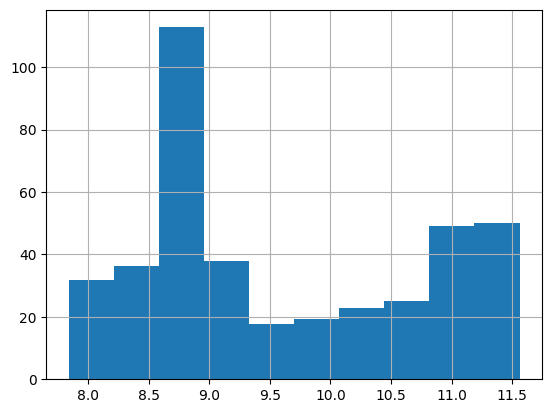

In [157]:
# dfs = pd.concat(dfs)
dfs.loc[(dfs.t_smeared>0.2) & (dfs.t_smeared<1) &(dfs.theta_smeared>14) & (dfs.theta_smeared<50)].mJpsi2_smeared.hist(bins = np.linspace(2.8**2, 3.4**2, 11), weights = dfs.loc[(dfs.t_smeared>0.2) & (dfs.t_smeared<1) &(dfs.theta_smeared>14) & (dfs.theta_smeared<50)].weights)

In [395]:
he4_rates*ft_rates*coincidence_time * 86400 * 200

339416.28221706336

In [122]:
len(elastic_tail_he4_theta[elastic_tail_he4_p_smeared>0.2])

6896998

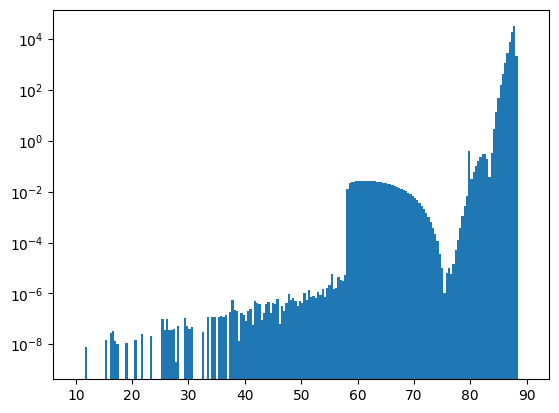

In [121]:
plt.hist(np.degrees(elastic_tail_he4_theta[elastic_tail_he4_p_smeared>0.2]), bins = np.linspace(10, 90, 201), weights = xsec[elastic_tail_he4_p_smeared>0.2]* (abst.max() - abst.min()) / N * luminosity_extended_in_nb  )
plt.yscale('log')

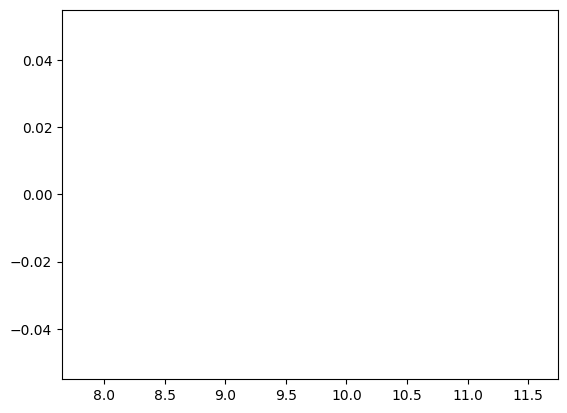

In [370]:
cond = (np.degrees(elastic_tail_he4_theta_smeared )>10 ) & (np.degrees(elastic_tail_he4_theta_smeared)< 50) & (elastic_tail_he4_p_smeared>0.2)  &  (elastic_tail_he4_p_smeared<1)
plt.hist(mJpsi2_smeared[cond], bins = np.linspace(2.8**2, 3.4**2, 101), weights = xsec[cond]* (abst.max() - abst.min()) / N * luminosity_extended_in_nb*ft_rates*coincidence_time*86400*200  )
# plt.yscale('log')
plt.show()

In [350]:
len(mJpsi2_smeared)

9764354

In [231]:
he4_rates*ft_rates*coincidence_time

27452789.35038956

In [232]:
np.sum(xsec*(abst.max() - abst.min())/N*luminosity_extended_in_nb*  4*120*10**6 /len(mJpsi2_smeared) * 4*10**(-9) * 100 *86400)

31589563.32198572

In [233]:
np.mean(xsec)*(abst.max() - abst.min())/N

0.06347568504449934

In [234]:
np.mean( he4_rates *  ft_rates  * coincidence_time)# * 100 *86400)

27452789.35038956

In [235]:
mJpsi2_smeared

array([-6.71974543,  0.31156875, -2.92702792, ...,  0.2519557 ,
       -3.15072789, -3.73145454])

In [242]:
nbins = 14
tbins = np.linspace(0.225, 0.925, nbins + 1)
hist, tbins, jpsibins = np.histogram2d(elastic_tail_he4_t_smeared, mJpsi2_smeared , bins =[tbins, np.linspace(2.8**2, 3.4**2, 41)], weights =  (xsec/N) * (abst.max() - abst.min()) * luminosity_extended_in_nb * ft_rates*coincidence_time *86400 * 200 )

In [245]:
hist

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ],
       [2033.61652128,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.    

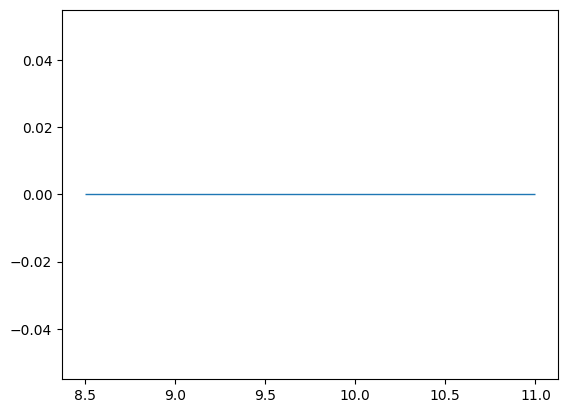

In [244]:
plt.hist(jpsibins[: -1], bins = np.linspace(8.5, 11, 101), weights = hist[3, :], histtype = 'step')
# plt.yscale('log')
plt.show()

In [224]:
np.sum(xsec*(abst.max() - abst.min())/N*luminosity_extended_in_nb)/he4_xsec

0.9999190999999977

In [223]:
he4_xsec

241022862471.0288

In [219]:
*  4*120*10**6 /len(mJpsi2) * 4*10**(-9) * 100 *86400

array([1.62101139e+10, 1.03744227e+10, 7.20442545e+09, ...,
       2.22419319e-12, 6.56714636e-10, 3.07474692e-11])

In [218]:
np.sum(hist)

246021025309.0624

In [169]:
he4_rates

1446020760737.0889

In [170]:
he4_rates*ft_rates*coincidence_time

2776359860615.211

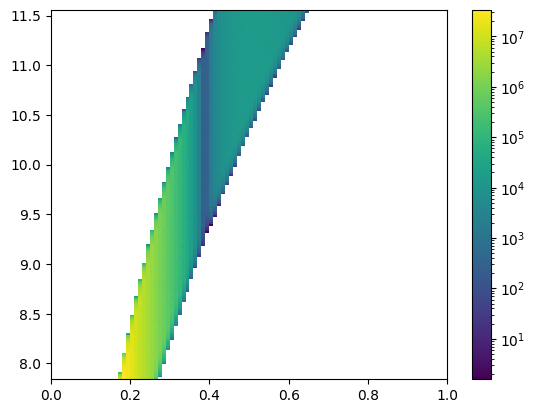

In [190]:
h = plt.hist2d(abst_tr, mJpsi2, bins =[np.linspace(0, 1, 101), np.linspace(2.8**2, 3.4**2, 201)], weights = xsec*(abst.max() - abst.min())/N * luminosity_extended_in_nb*  4*120*10**6  * 4*10**(-9) * 100 *86400, cmin = 1, norm = LogNorm())
plt.colorbar(h[3])
# plt.ylim(bottom=0.1)
# plt.xlim([7, 11])
plt.show()

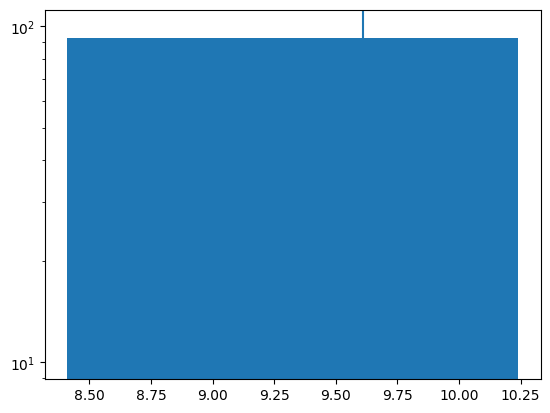

In [216]:
weights = xsec*(abst.max() - abst.min())/N*luminosity_extended_in_nb*  4*120*10**6 /len(mJpsi2) * 4*10**(-9) * 100 *86400
abst_t_min = 0.2
abst_t_max = 0.6

plt.hist(mJpsi2[ (abst_tr>abst_t_min) & (abst_tr<abst_t_max)], bins =np.linspace(2.9**2, 3.2**2, 1+1), weights = weights[ (abst_tr>abst_t_min) & (abst_tr<abst_t_max)] )
plt.axvline(3.1**2)
plt.yscale('log')

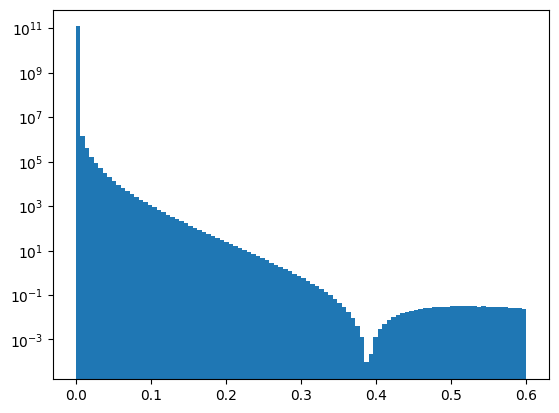

In [175]:
luminosity_extended_in_nb = 30
plt.hist(abst_tr, bins = np.linspace(0, 0.6, 100+1), weights = xsec*luminosity_extended_in_nb/10**7 )#, weights =xsec)
plt.yscale('log')
plt.show()

In [150]:
np.histogram(abst_tr, bins = 100, weights = xsec*luminosity_extended_in_nb/10**7)

(array([7.10499111e+11, 4.40039571e+06, 1.23470300e+06, 5.25423260e+05,
        2.70192178e+05, 1.54099325e+05, 9.49347160e+04, 6.13498658e+04,
        4.12600950e+04, 2.85280595e+04, 2.01291596e+04, 1.45735811e+04,
        1.06445568e+04, 7.89877553e+03, 5.95680036e+03, 4.52960084e+03,
        3.46250355e+03, 2.66186202e+03, 2.07706185e+03, 1.62013237e+03,
        1.27385126e+03, 1.00305018e+03, 7.96515366e+02, 6.33626627e+02,
        5.04954607e+02, 4.04946367e+02, 3.24999640e+02, 2.60805279e+02,
        2.09932846e+02, 1.69741583e+02, 1.36967071e+02, 1.10577970e+02,
        8.94987345e+01, 7.28094738e+01, 5.89011076e+01, 4.76823072e+01,
        3.88271456e+01, 3.14192214e+01, 2.54061975e+01, 2.05145594e+01,
        1.65913029e+01, 1.33712347e+01, 1.07651051e+01, 8.60618556e+00,
        6.93495109e+00, 5.51718008e+00, 4.39031122e+00, 3.48062673e+00,
        2.73134832e+00, 2.12625976e+00, 1.65755954e+00, 1.27533582e+00,
        9.72248687e-01, 7.31435583e-01, 5.41743786e-01, 3.951457

In [ ]:
luminosity_extended_in_nb = 30
dummy = np.linspace(0.2, 0.5, 101)
plt.plot(dummy, dsigmadQ2(dummy, 10.604)*luminosity_extended_in_nb)
plt.yscale('log')

In [300]:
Q2 = hbar**2 *28.87
E_e = 2.091
Eprime_theta = np.radians(2.5)
E_e_prime = Q2/4/E_e/np.sin(Eprime_theta/2)**2
dsigmadOmega(abst, E_e_prime, Eprime_theta, 10.604)

array([2.16751963e+07, 2.16750913e+07, 2.16749864e+07, ...,
       1.94165840e-02, 1.94167560e-02, 1.94169281e-02])

In [174]:
fc(Q2)

-0.0015572598614898815